# <center>Создание гиф-анимации поведения модели</center>

__Импорты:__

In [60]:
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation,  PillowWriter
import numpy as np
%matplotlib notebook

__Функции:__

In [61]:
def f(x, delay, n=1):
    '''
    Функция, график которой будет отображаться процессе анимации.
    '''
    if n == 1:
        return 15 * np.sin(5*x) * np.exp(-delay)
    elif n == 2:
        return 15 * np.sin(5*x) * np.exp(-delay) + 5
    elif n == 3:
        return 9 * np.sin(5*x) * np.exp(-25*delay) - 5 * x
    elif n == 4:
        return -18 * np.sin(3*x) * np.exp(-18*delay) + 5 * x**2

__Функция, вызываемая для каждого кадра:__

In [68]:
def main_func(frame, line, x, n=2):
    '''
    frame - параметр, который изменяется от кадра к кадру.
    line - кривая, для которой изменяются данные.
    x - список точек по оси X, для которых рассчитывается функция Гаусса.
    n - номер модели
    '''
    y = f(x, frame, n)
    line.set_ydata(y)
    return [line]

<IPython.core.display.Javascript object>


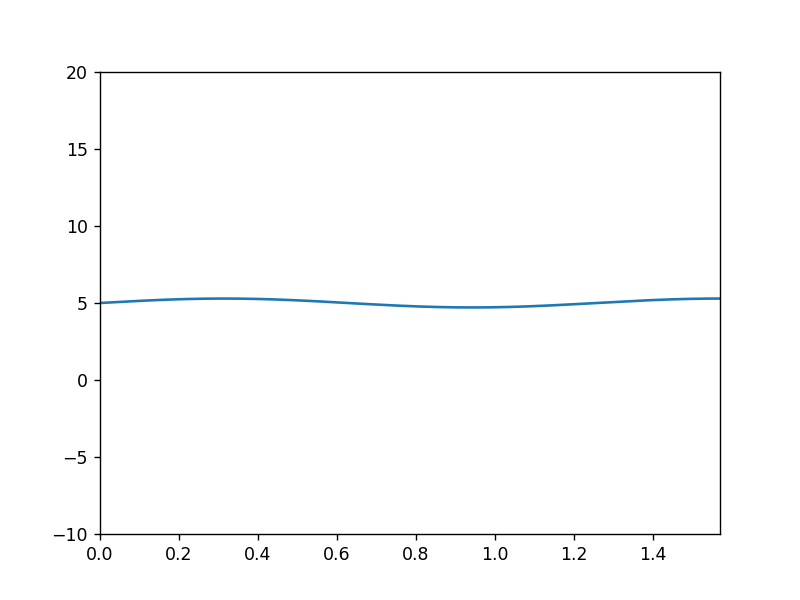

In [69]:
# Параметры отображаемой функции
maxSize = 0.5*np.pi

# Диапазон точек для расчета графика функции
x = np.arange(0., maxSize, 0.0001)

# Значения графика функции
y = np.zeros(len(x))

# Создание окна для графика
fig, ax = plt.subplots()

# Установка отображаемых интервалов по осям
ax.set_xlim(0, 0.5*np.pi)
ax.set_ylim(-10., 20.)

# Создание линии, которую будем анимировать
line, = ax.plot(x, y)

# !!! Параметр, который будет меняться от кадра к кадру
frames = np.arange(0., 4., 0.05)

# !!! Задержка между кадрами в мс
interval = 30

# !!! Использовать ли буферизацию для устранения мерцания
blit = True

# !!! Будет ли анимация циклической
repeat = False

animation = FuncAnimation(
        fig,
        func=main_func,
        frames=frames,
        fargs=(line, x),
        interval=interval,
        blit=blit,
        repeat=repeat)

animation.save("model3.gif",fps=5,writer='pillow')